In [0]:
import math
import torch
import matplotlib.pyplot as plt
import pdb
import pandas as pd  
import seaborn as sns 
import numpy as np

%matplotlib inline

In [99]:
#dataset = [[0,1,1,0,0,1]]  # 1.0, 0.0, 1.0 pattern quantized at resolution 2, i.e. each point becomes two classes - 0 class and 1 class
dataset = [[0.2], [0.8]]  # 1.0, 0.0, 1.0 pattern quantized at resolution 2, i.e. each point becomes two classes - 0 class and 1 class
dataset = torch.tensor(dataset).float()
print("dataset", dataset.shape)

# input_shape = dataset.shape[1:]
# pattern_count = 5
# patterns = torch.rand((5,) + input_shape)
# print("patterns", patterns.shape)
# patterns = torch.cat((1-dataset, dataset-0.1, patterns))
# patterns

patterns = torch.linspace(0, 1, 200).unsqueeze(-1)
patterns

dataset torch.Size([2, 1])


tensor([[0.0000],
        [0.0050],
        [0.0101],
        [0.0151],
        [0.0201],
        [0.0251],
        [0.0302],
        [0.0352],
        [0.0402],
        [0.0452],
        [0.0503],
        [0.0553],
        [0.0603],
        [0.0653],
        [0.0704],
        [0.0754],
        [0.0804],
        [0.0854],
        [0.0905],
        [0.0955],
        [0.1005],
        [0.1055],
        [0.1106],
        [0.1156],
        [0.1206],
        [0.1256],
        [0.1307],
        [0.1357],
        [0.1407],
        [0.1457],
        [0.1508],
        [0.1558],
        [0.1608],
        [0.1658],
        [0.1709],
        [0.1759],
        [0.1809],
        [0.1859],
        [0.1910],
        [0.1960],
        [0.2010],
        [0.2060],
        [0.2111],
        [0.2161],
        [0.2211],
        [0.2261],
        [0.2312],
        [0.2362],
        [0.2412],
        [0.2462],
        [0.2513],
        [0.2563],
        [0.2613],
        [0.2663],
        [0.2714],
        [0

winner_index tensor(40)


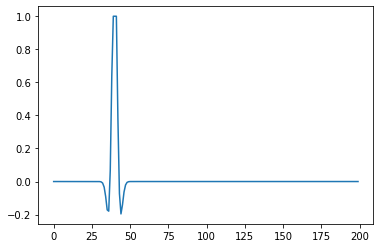

In [100]:
def similarity(x, patterns, subset_threshold=0.2):
  # Formula derivation https://www.desmos.com/calculator/iokn9kyuaq
  # print("x", x)
  dist = (x - patterns) ** 2
  # print("patterns", patterns)
  # print("dist", dist)
  dist = dist.sum(dim=-1) # TODO: use subset activation # TODO: apply mask (inverse variance)
  winner_index = dist.min(dim=0)[1]
  print("winner_index", winner_index)

  winning_pattern = patterns[winner_index]
  a = 0.2 * ((x - winning_pattern) ** -2)
  a[a > 5000.0] = 5000.0
  # print("a", a)
  s = 0.8
  sim = -a * (x - patterns) ** 2
  # print("sim", sim)
  sim = (torch.exp(sim) - s * torch.exp(sim * 0.8)) / ((1 - s) * 0.685)
  sim[sim>1.0] = 1.0
  # print("sim", sim)

  return sim

sim = similarity(dataset[0], patterns)
plt.plot(sim.view(-1))
original_patterns = patterns.clone()

Here we demonstrate a mexican hat type function suitable for simulating local (in pattern space) attraction, followed by replusion a bit further away, followed by no influence further out.

The function adjusts its variance such that the winner (i.e. closest pattern to the given input) results in 1.0 activation.

Now let's adjust the patterns to move towards the input x based on the influence indicated by the mexican hat function

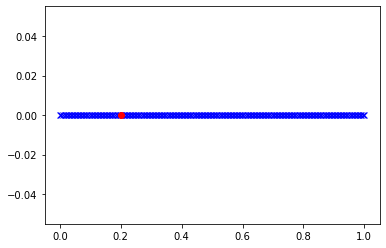

winner_index tensor(40)


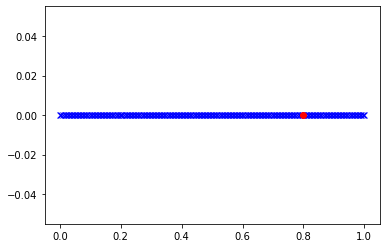

winner_index tensor(159)


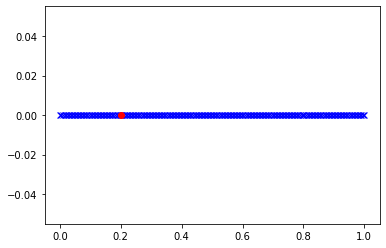

winner_index tensor(40)


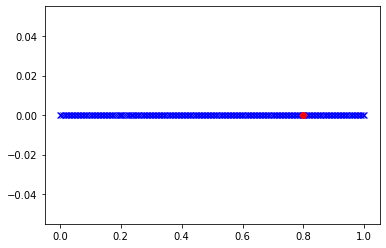

winner_index tensor(159)


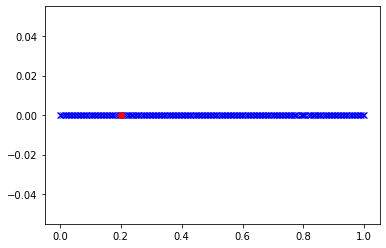

winner_index tensor(40)


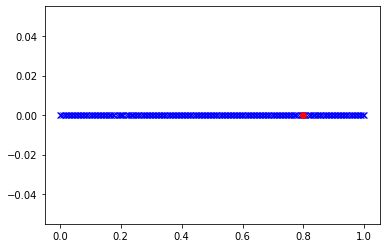

winner_index tensor(159)


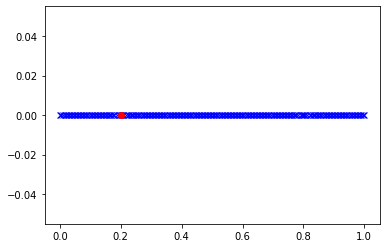

winner_index tensor(40)


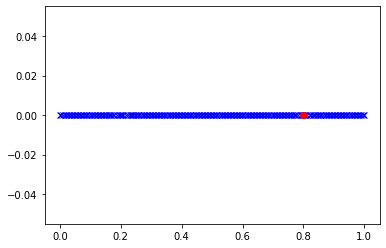

winner_index tensor(159)


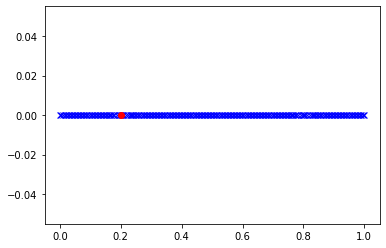

winner_index tensor(40)


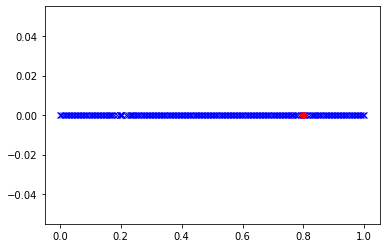

winner_index tensor(159)


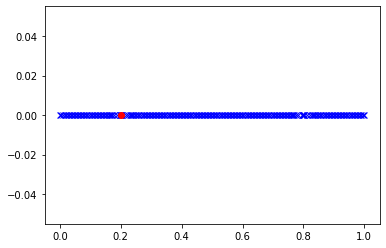

winner_index tensor(40)


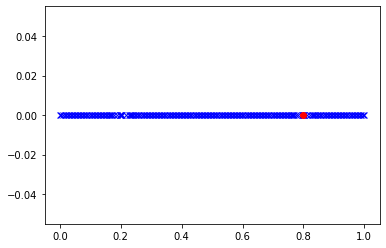

winner_index tensor(159)


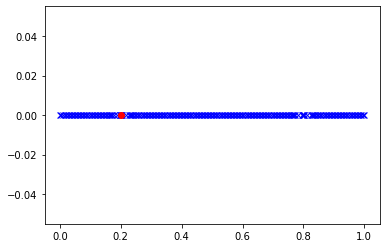

winner_index tensor(40)


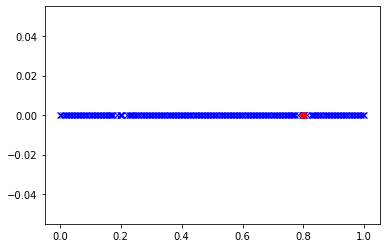

winner_index tensor(159)


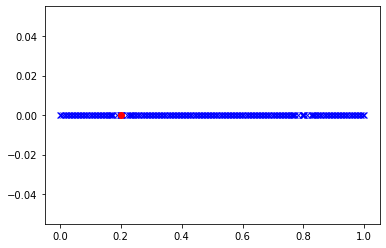

winner_index tensor(40)


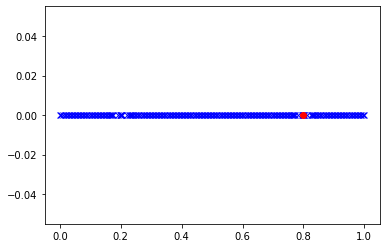

winner_index tensor(159)


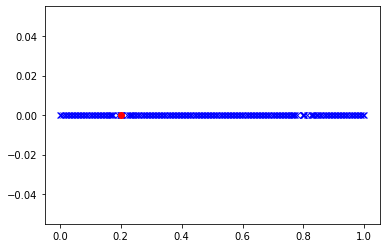

winner_index tensor(40)


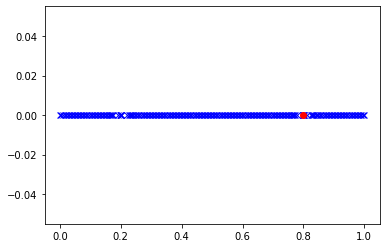

winner_index tensor(159)


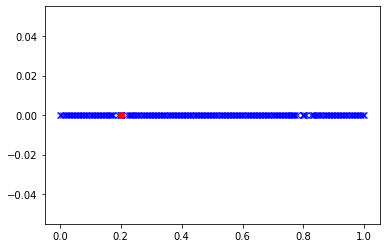

winner_index tensor(40)


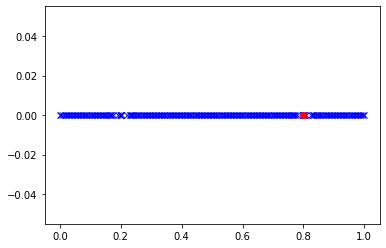

winner_index tensor(159)


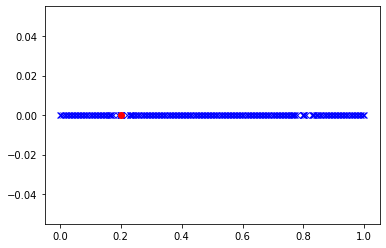

winner_index tensor(40)


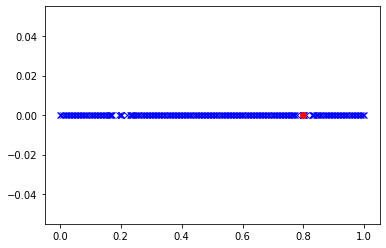

winner_index tensor(159)


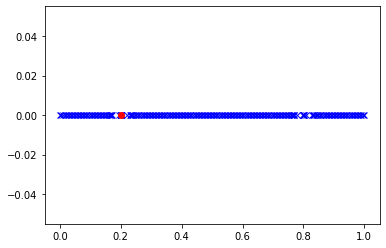

winner_index tensor(40)


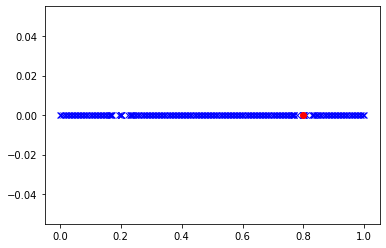

winner_index tensor(159)


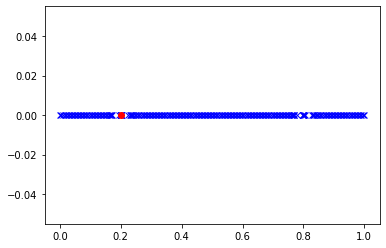

winner_index tensor(40)


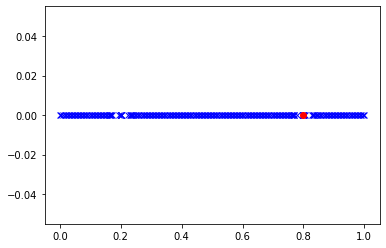

winner_index tensor(159)


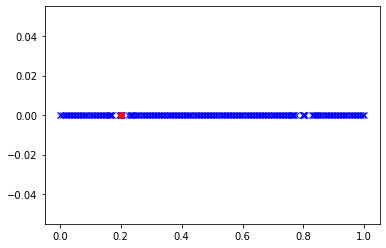

winner_index tensor(40)


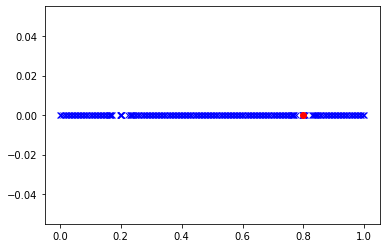

winner_index tensor(159)


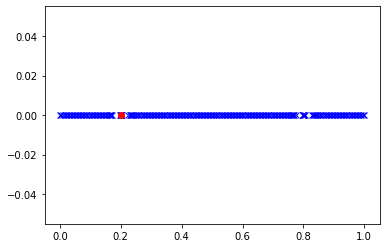

winner_index tensor(40)


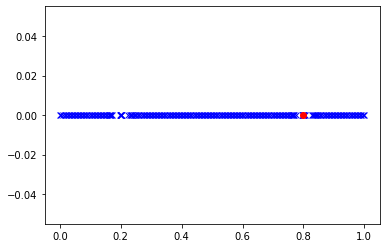

winner_index tensor(159)


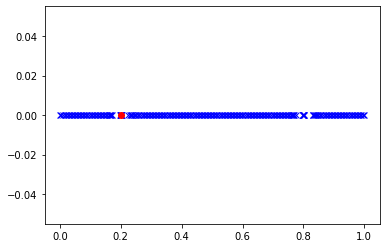

winner_index tensor(40)


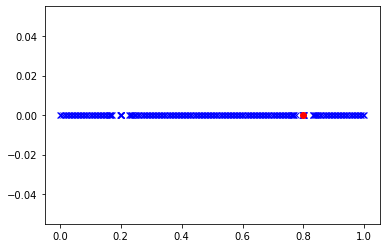

winner_index tensor(159)


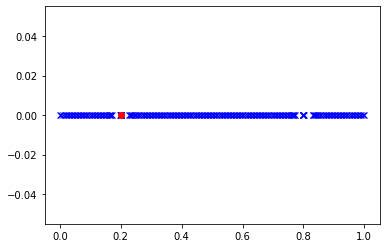

winner_index tensor(40)


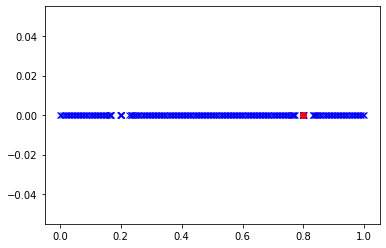

winner_index tensor(159)


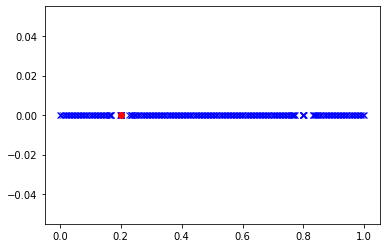

winner_index tensor(40)


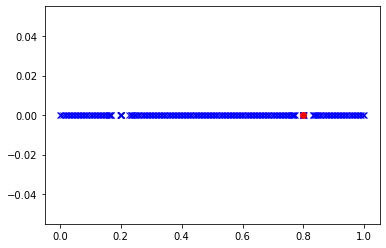

winner_index tensor(159)


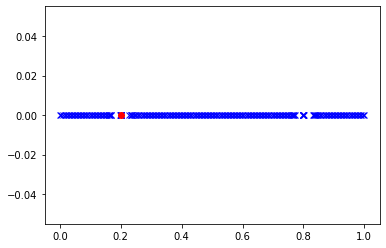

winner_index tensor(40)


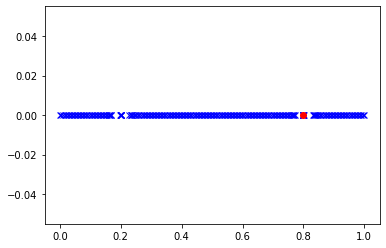

winner_index tensor(159)


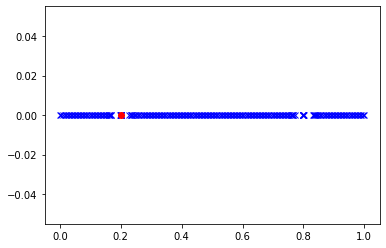

winner_index tensor(40)


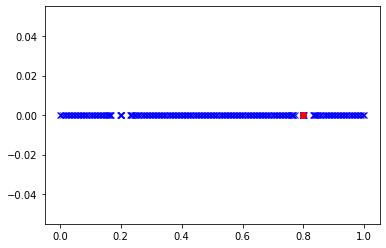

winner_index tensor(159)


In [101]:
patterns = original_patterns
def plot_patterns(patterns, x):
  plt.plot(patterns.view(-1), torch.zeros_like(patterns.view(-1)), 'xb')
  plt.plot(x.view(-1), torch.zeros_like(x.view(-1)), 'or')
  plt.show()

lr = 0.2
for i in range(20):
  for x in dataset:
    plot_patterns(patterns, x)
    sim = similarity(x, patterns)
    delta = (x - patterns) * sim * lr
    patterns = patterns + delta

Notice space clearing around the input patterns. Can this be interpreted as edge detection/enhancement?

We used a single point input in this experiment. Next, let's use 2 point vector inputs. Follow that by n point vectors and then nxm grid inputs (images).